# **CSCE 5218 / CSCE 4930 Deep Learning**

- __Name:__ Ngoc Phan
- __Assignment:__ Homework 2
- __Due date:__ 2/6/2022

# **HW1a The Perceptron** (20 pt)

In [1]:
import math
import itertools
import re

In [2]:
# Get the datasets
!python -m wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!python -m wget http://huang.eng.unt.edu/CSCE-5218/train.dat


Saved under test.dat

Saved under train.dat


In [3]:
# Take a peek at the datasets
#!head train.dat
#!head test.dat
print("Train dataset (first 10 rows):\n")
with open("train.dat", 'r') as f:
    for i in range(10):
        print(f.readline())

Train dataset (first 10 rows):

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	

1	1	0	0	0	0	0	0	1	1	0	0	1	0

0	0	1	1	0	1	1	0	0	0	0	0	1	0

0	1	0	1	1	0	1	0	1	1	1	0	1	1

0	0	1	0	0	1	0	1	0	1	1	1	1	0

0	1	0	0	0	0	0	1	1	1	1	1	1	0

0	1	1	1	0	0	0	1	0	1	1	0	1	1

0	1	1	0	0	0	1	0	0	0	0	0	1	0

0	0	0	1	1	0	1	1	1	0	0	0	1	0

0	0	0	0	0	0	1	0	1	0	1	0	1	0



In [4]:
# Take a peek at the datasets
print("Test dataset (first 10 rows):\n")
with open("test.dat", 'r') as f:
    for i in range(10):
        print(f.readline())

Test dataset (first 10 rows):

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13

1	1	1	1	0	0	1	1	0	0	0	1	1	0

0	0	0	1	0	0	1	1	0	1	0	0	1	0

0	1	1	1	0	1	1	1	1	0	0	0	1	0

0	1	1	0	1	0	1	1	1	0	1	0	1	0

0	1	0	0	0	1	0	1	0	1	0	0	1	0

0	1	1	0	0	1	1	1	1	1	1	0	1	0

0	1	1	1	0	0	1	1	0	0	0	1	1	0

0	1	0	0	1	0	0	1	1	0	1	1	1	0

1	1	1	1	0	0	1	1	0	0	0	0	1	0



### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [5]:
# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = [list(map(int, instance.strip().split('\t')))]
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance[0]
        data += [instance]
    return data

In [6]:
def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    d_product = 0
    for i, a1_value in enumerate(array1):
        d_product += a1_value * array2[i]
    return d_product

In [7]:
def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1.0 / (1.0 + math.exp(-x))

In [8]:
# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weight, instance))

In [9]:
# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0

In [10]:
# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)

In [11]:
# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    # Weight initialization
    # - create a list of weights
    # - initialize each element to 0
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # Compute a dot product of weights and inputs
            # - multiply the weight values by the input values and then add them
            in_value = dot_product(weights, instance)
            # Calculate the output value
            # - apply sigmoid function on the dot product value computed from previous step
            output = sigmoid(in_value)
            # Compute the error
            error = instance[-1] - output
            #TODO: name these steps
            # Perceptron Weight Adjustment
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [12]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.

### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

In train_perceptron function, we need to obtain a true magnitude of the error to adjust the weight.

While the sigmoid function returns a probability value between 0 and 1, the predict function maps the probability value returned from the sigmoid function to either 1 for a probablity >= 0.5 or 0 otherwise. Hence, since the predict function returns a Boolean value of either 0 or 1, the computed error that is based on the output of the predict function would either has a value of -1, 0, or 1. As a result, the computed error does not reflect a true error magnitude of the instance and should not be used to adjust the weight. 

The output of the sigmoid function, on the other hand, should be used to compute the error because the original output value has been retained without rounding down or up to produce a Boolean value. Therefore, the computed error would reflect a true error magnitude of the instance, and thus be more suitable for Perceptron weight adjustment.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [13]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

# save data for visualization
n_samples = []
learning_rate = []
n_epochs = []
accuracy_list = []

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size =  round(len(instances_tr)*tr_size/100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            
            # save data for visualization
            n_samples.append(size)
            learning_rate.append(lr)
            n_epochs.append(epochs)
            accuracy_list.append(accuracy)
            
        # display accuracy at the end of each training loop
        print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

# create a dataframe of results
import pandas as pd
results = pd.DataFrame({'Training Size': n_samples, 'epochs': n_epochs,
                        'Learning Rate': learning_rate, 'Accuracy': accuracy_list})

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# define a function to create a line plot of Training Size vs. Accuracy
def plot_accuracy(lr):
    global num_epochs, results
    
    # create a line plot for each epoch
    for epochs in num_epochs:
        data = results.loc[(results['epochs'] == epochs) & 
                           (results['Learning Rate'] == lr)]
        plt.plot(data['Training Size'], data['Accuracy'], 
                 label = 'epochs = ' + str(epochs), marker='o')
    
    plt.legend(frameon=False, bbox_to_anchor=(1,1), loc="upper left")
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy (%)')
    plt.title('Learning Rate = ' + str(lr))
    plt.show()

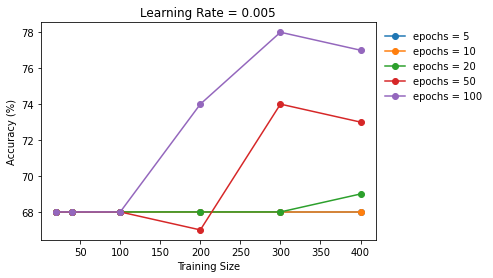

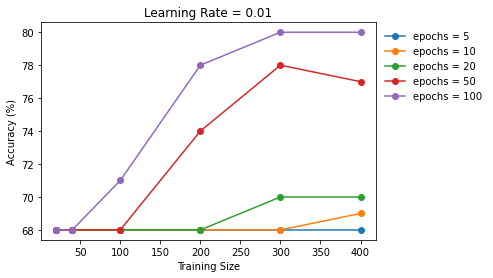

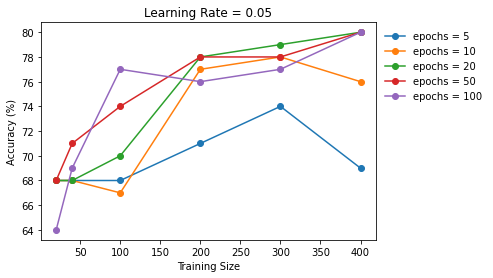

In [15]:
# create a line plot of Training Size vs. Accuracy for each learning rate
for lr in lr_array:
    plot_accuracy(lr)

__A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?__

According to the line plots of Training Size vs. Accuracy above, the accuracy seems to go up and down for various training sizes at a given learning rate and epochs value. For the same learning rate and epochs value, some smaller training sizes have a higher accuracy than that of larger training sizes. Therefore, sometimes we do not need to train the model with all the training dataset to get a highest accuracy with the test set.

The following output shows that at a learning rate of 0.005 and an epochs value of 50, the training size of 300 has a higher accuracy than that of the training size of 400.

In [16]:
results.loc[(results['epochs'] == 50) & (results['Learning Rate'] == 0.005)]

,Training Size,epochs,Learning Rate,Accuracy
3,20,50,0.005,68.0
8,40,50,0.005,68.0
13,100,50,0.005,68.0
18,200,50,0.005,67.0
23,300,50,0.005,74.0
28,400,50,0.005,73.0


__B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?__
```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```

__Answer:__

Sometimes a model trained on a larger dataset has a lower accuracy than that of a model trained on a smaller dataset due to several reasons:

- Each model has a different set of selected values for hyperparameters. Therefore, the model trained on a larger dataset may not have an optimized set of hyperparameter values. Hence, a hyperparameter tuning is needed to increase the model's accuracy.
- The model trained on a larger dataset may overfit the training data and do not generalize well on the test data.

__C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?__

According to the output [17], the accuracy seems to be highest when the training size and epochs value are large for a moderate (0.01) or high (0.05) learning rate. 

Based on output [18], when we use all the training dataset, the accuracy seems to decrease or stay when we increase the epochs and/or learning rate above 100 and/or 0.05, respectively. 

Hence, we may not get a higher accuracy with additional hyperparameters. However, we may need to collect more training data to increase the accuracy.

In [17]:
results.loc[(results['Accuracy'] >= 80)]

,Training Size,epochs,Learning Rate,Accuracy
54,300,100,0.01,80.0
59,400,100,0.01,80.0
87,400,20,0.05,80.0
88,400,50,0.05,80.0
89,400,100,0.05,80.0


In [18]:
tr_percent = [100] # percent of the training dataset to train with
num_epochs = [100, 120, 130, 140]     # number of epochs
lr_array = [0.01, 0.05, 0.07, 0.09]        # learning rate

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size =  round(len(instances_tr)*tr_size/100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            
            # display accuracy
            print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 120, learning rate: 0.010; Accuracy (test, 100 instances): 79.0
#tr: 400, epochs: 130, learning rate: 0.010; Accuracy (test, 100 instances): 79.0
#tr: 400, epochs: 140, learning rate: 0.010; Accuracy (test, 100 instances): 79.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 120, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 130, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 140, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.070; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 120, learning rate: 0.070; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 130, learning rate: 0.070; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 140, learning rate: 0.070; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs

__D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?__

According to the output [18] above, it does not always worth training with more epochs because once we increase the epochs to a certain value, the accuracy may stay the same or decrease if we continue to train the model for larger epochs values.